In [55]:
import data.data_loader as dl

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 확인
dl.load_olympic().head(20)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,host_NOC,is_host
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,ESP,False
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,GBR,False
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,BEL,False
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,FRA,False
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,CAN,False
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN,CAN,False
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,NaN,FRA,False
7,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",NaN,FRA,False
8,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,NaN,NOR,False
9,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,"Speed Skating Women's 1,000 metres",NaN,NOR,False


In [56]:
# 데이터 확인용 코드
df["Year"].value_counts().sort_index()

# df["Team"].value_counts()
# 1. Team
# len(df["Team"].value_counts())  # 1184

# 2. City: 올림픽이 열린 도시 이름 -> 국가로 변경할 필요
#df[["Games", 'City']].value_counts().sort_index()   # 1896부터 2016까지 120년 단위.

# Sports
# len(df['Sport'].value_counts()) # 66
# df['Sport'].value_counts()

# len(df[['Sport', 'Event']].value_counts())  # 765
#df[['Sport', 'Event']].value_counts().sort_index()
# df._get_column_array()

Year
1896      380
1900     1936
1904     1301
1906     1733
1908     3101
1912     4040
1920     4292
1924     5693
1928     5574
1932     3321
1936     7401
1948     7480
1952     9358
1956     6434
1960     9235
1964     9480
1968    10479
1972    11959
1976    10502
1980     8937
1984    11588
1988    14676
1992    16413
1994     3160
1996    13780
1998     3605
2000    13821
2002     4109
2004    13443
2006     4382
2008    13602
2010     4402
2012    12920
2014     4891
2016    13688
Name: count, dtype: int64

# 1. 프로젝트 개요

# 2. 데이터 전처리

In [57]:
# 데이터 호출
df = pd.read_csv('data/athlete_events.csv')
df.head(10)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,NaN
7,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
8,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,NaN
9,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,"Speed Skating Women's 1,000 metres",NaN


In [58]:
# 데이터 정보 확인
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  str    
 2   Sex     271116 non-null  str    
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  str    
 7   NOC     271116 non-null  str    
 8   Games   271116 non-null  str    
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  str    
 11  City    271116 non-null  str    
 12  Sport   271116 non-null  str    
 13  Event   271116 non-null  str    
 14  Medal   39783 non-null   str    
dtypes: float64(3), int64(2), str(10)
memory usage: 31.0 MB


<table border="1">
  <thead>
    <tr style="background-color: #f2f2f2;">
      <th>번호</th>
      <th>컬럼명 (Column)</th>
      <th>비결측치 (Non-Null)</th>
      <th>데이터 타입 (Dtype)</th>
      <th>설명</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>0</td>
      <td><strong>ID</strong></td>
      <td>271,116</td>
      <td>int64</td>
      <td>선수 고유 식별 번호</td>
    </tr>
    <tr>
      <td>1</td>
      <td><strong>Name</strong></td>
      <td>271,116</td>
      <td>object</td>
      <td>선수 이름</td>
    </tr>
    <tr>
      <td>2</td>
      <td><strong>Sex</strong></td>
      <td>271,116</td>
      <td>object</td>
      <td>성별 (M/F)</td>
    </tr>
    <tr>
      <td>3</td>
      <td><strong>Age</strong></td>
      <td>261,642</td>
      <td>float64</td>
      <td>나이 (결측치 존재)</td>
    </tr>
    <tr>
      <td>4</td>
      <td><strong>Height</strong></td>
      <td>210,945</td>
      <td>float64</td>
      <td>키 (cm)</td>
    </tr>
    <tr>
      <td>5</td>
      <td><strong>Weight</strong></td>
      <td>208,241</td>
      <td>float64</td>
      <td>몸무게 (kg)</td>
    </tr>
    <tr>
      <td>6</td>
      <td><strong>Team</strong></td>
      <td>271,116</td>
      <td>object</td>
      <td>참가 팀/국가</td>
    </tr>
    <tr>
      <td>7</td>
      <td><strong>NOC</strong></td>
      <td>271,116</td>
      <td>object</td>
      <td>국가 코드 (3자)</td>
    </tr>
    <tr>
      <td>8</td>
      <td><strong>Games</strong></td>
      <td>271,116</td>
      <td>object</td>
      <td>대회 명칭 (연도+계절)</td>
    </tr>
    <tr>
      <td>9</td>
      <td><strong>Year</strong></td>
      <td>271,116</td>
      <td>int64</td>
      <td>개최 연도</td>
    </tr>
    <tr>
      <td>10</td>
      <td><strong>Season</strong></td>
      <td>271,116</td>
      <td>object</td>
      <td>계절 (Summer/Winter)</td>
    </tr>
    <tr>
      <td>11</td>
      <td><strong>City</strong></td>
      <td>271,116</td>
      <td>object</td>
      <td>개최 도시</td>
    </tr>
    <tr>
      <td>12</td>
      <td><strong>Sport</strong></td>
      <td>271,116</td>
      <td>object</td>
      <td>종목</td>
    </tr>
    <tr>
      <td>13</td>
      <td><strong>Event</strong></td>
      <td>271,116</td>
      <td>object</td>
      <td>세부 종목</td>
    </tr>
    <tr>
      <td>14</td>
      <td><strong>Medal</strong></td>
      <td>39,783</td>
      <td>object</td>
      <td>획득 메달 (Gold/Silver/Bronze)</td>
    </tr>
  </tbody>
</table>

In [68]:
# 데이터 정보 확인
df.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


## 2-1. 결측치/ 이상치 제거

In [60]:
# 신체 정보 결측치 확인
missing_height = df['Height'].isnull().sum()
missing_weight = df['Weight'].isnull().sum()

print(f'missing height: {missing_height}, missing weight: {missing_weight}')

# 필수 데이터(Height, Weight)가 없는 행 제거
df_clean = df.dropna(subset=['Height', 'Weight'])
clean_count = len(df_clean)

print(f'clean_count: {clean_count}')

# 메달
df_clean['Medal'] = df_clean['Medal'].fillna('None')

df_clean

missing height: 60171, missing weight: 62875
clean_count: 206853


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,None
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,None
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,None
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",None
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,None
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",None
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",None
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,None


## 2-2. 중복 데이터 제거

In [61]:
# ID와 Year에 따라 중복된 데이터 제거
# 동일 연도에 중복 참여한 선수는 하나만 남기고 제거
duplicates = df_clean[df_clean.duplicated(subset=['ID', 'Year'], keep=False)]
print(duplicates)

df_dupl = df_clean.drop_duplicates(subset=['ID', 'Year'])
print(df_dupl)
print(f'non_dupl_count: {len(df_dupl)}')

            ID                      Name Sex   Age  Height  Weight  \
4            5  Christine Jacoba Aaftink   F  21.0   185.0    82.0   
5            5  Christine Jacoba Aaftink   F  21.0   185.0    82.0   
6            5  Christine Jacoba Aaftink   F  25.0   185.0    82.0   
7            5  Christine Jacoba Aaftink   F  25.0   185.0    82.0   
8            5  Christine Jacoba Aaftink   F  27.0   185.0    82.0   
...        ...                       ...  ..   ...     ...     ...   
271095  135559          Pawe Jan Zygmunt   M  25.0   182.0    79.0   
271096  135559          Pawe Jan Zygmunt   M  29.0   182.0    79.0   
271097  135559          Pawe Jan Zygmunt   M  29.0   182.0    79.0   
271112  135570                  Piotr ya   M  27.0   176.0    59.0   
271113  135570                  Piotr ya   M  27.0   176.0    59.0   

               Team  NOC        Games  Year  Season            City  \
4       Netherlands  NED  1988 Winter  1988  Winter         Calgary   
5       Netherlan

## 2-3. 필요없는 컬럼 제거
* ID/Name (고유 식별자): 선수 개인의 식별 정보인 ID와 Name은 통계적 분석(평균, 상관관계)에 의미가 없으며, 모델의 과적합을 방지하기 위해 제거
    * 다만, 한 해에도 여러 게임에 참여하는 선수가 있으므로, 중복 선수 제거 후 컬럼 제거

* Games vs Year/Season (중복 정보): 연도와 계절이 합쳐진 형태로, 이미 Year와 Season 컬럼이 따로 존재하므로 데이터 중복(Redundancy)을 피하기 위해 하나를 제거

* City (장소 정보): 올림픽 개최 도시는 선수의 신체 조건이나 메달 획득 여부와 직접적인 인과관계가 낮다고 판단하여 분석 범위에서 제외

In [62]:
# 우선 보류.

## 2-4. 필요한 데이터 추가
데이터에서 제공해주는 키와 몸무게 뿐만 아니라, 체격의 균형을 보여주는 BMI지수 생성

In [63]:
# BMI 지수 생성 ($BMI = kg / m^2$)
df_dupl['BMI'] = df_dupl['Weight'] / (df_dupl['Height'] / 100) ** 2

# 분석 대상 종목 선정 (특성이 뚜렷한 3종목)
target_sports = ['Swimming', 'Gymnastics', 'Basketball']
df_target = df_dupl[df_dupl['Sport'].isin(target_sports)].copy()

df_dupl

df_target

#print(f"전처리 후 데이터 수: {len(df_target)}건")

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,BMI
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,None,24.691358
41,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze,20.897959
49,17,Paavo Johannes Aaltonen,M,32.0,175.0,64.0,Finland,FIN,1952 Summer,1952,Summer,Helsinki,Gymnastics,Gymnastics Men's Individual All-Around,None,20.897959
100,36,Stefan Remco Aartsen,M,21.0,194.0,78.0,Netherlands,NED,1996 Summer,1996,Summer,Atlanta,Swimming,Swimming Men's 100 metres Butterfly,None,20.724838
103,36,Stefan Remco Aartsen,M,25.0,194.0,78.0,Netherlands,NED,2000 Summer,2000,Summer,Sydney,Swimming,Swimming Men's 100 metres Butterfly,None,20.724838
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271011,135522,"Klaas Erik ""Klaas-Erik"" Zwering",M,19.0,189.0,80.0,Netherlands,NED,2000 Summer,2000,Summer,Sydney,Swimming,Swimming Men's 200 metres Backstroke,None,22.395790
271013,135522,"Klaas Erik ""Klaas-Erik"" Zwering",M,23.0,189.0,80.0,Netherlands,NED,2004 Summer,2004,Summer,Athina,Swimming,Swimming Men's 4 x 100 metres Freestyle Relay,Silver,22.395790
271026,135530,Philip Zwiener,M,23.0,202.0,98.0,Germany,GER,2008 Summer,2008,Summer,Beijing,Basketball,Basketball Men's Basketball,None,24.017253
271087,135556,Bogusaw Stanisaw Zychowicz,M,19.0,189.0,80.0,Poland,POL,1980 Summer,1980,Summer,Moskva,Swimming,Swimming Men's 100 metres Butterfly,None,22.395790


# 3. 시각화

## 3-1. 종목 간 신체 조건 구분(최적화)되었는지 확인


test: 15917
            ID                          Name Sex   Age  Height  Weight  \
364        202          Awad Abdel Nabi Awad   M  23.0   198.0    80.0   
642        370                  Shigeaki Abe   M  28.0   178.0    70.0   
888        509                  Gary Abraham   M  17.0   175.0    64.0   
1020       572            Rui Pinto de Abreu   M  15.0   177.0    64.0   
1440       803      Anne Wilma Adams (-King)   F  16.0   165.0    54.0   
...        ...                           ...  ..   ...     ...     ...   
269305  134756  Vladimir Viktorovich Zhigily   M  23.0   207.0   105.0   
270119  135138                      Rajko ii   M  21.0   210.0   110.0   
270457  135284                     Jan Zoulk   M  19.0   162.0    61.0   
270664  135363                  Angelo Zucca   M  20.0   167.0    63.0   
270721  135389                  Ryszard ugaj   M  19.0   192.0    81.0   

                  Team  NOC        Games  Year  Season      City       Sport  \
364              Eg

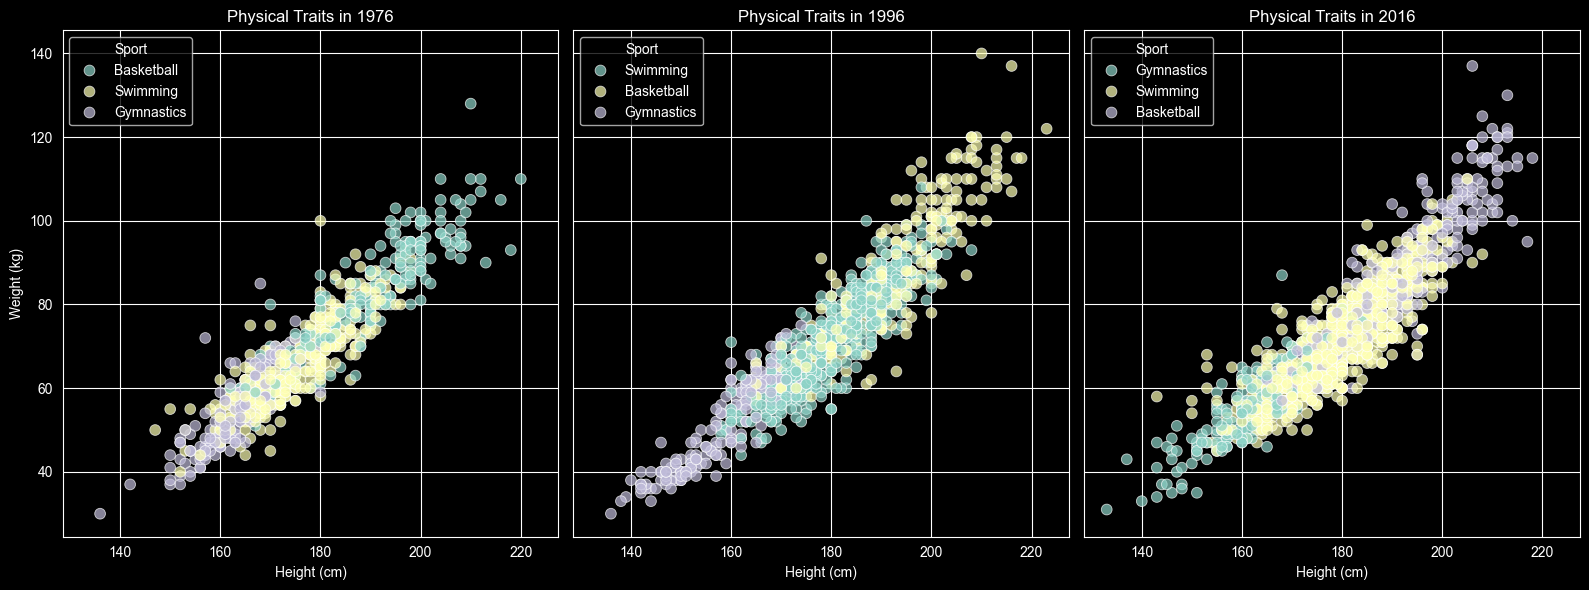

In [64]:
# 20년 간격으로 데이터의 수량이 그래프를 찍을만큼 의미가 있는 연도, 20년 간격,
# 1976, 1996, 2016
years = [1976, 1996, 2016]
fig, axes = plt.subplots(1, 3, figsize=(16, 6), sharex=True, sharey=True)

# 수량 확인
print(f'test: {len(df_target['Year'] == years[0])}')
print(df_target[df_target['Year'] == years[0]])

for i, year in enumerate(years):
    data_year = df_target[df_target['Year'] == year]
    sns.scatterplot(data=data_year, x='Height', y='Weight', hue='Sport',
                    ax=axes[i], alpha=0.7, s=60)
    axes[i].set_title(f'Physical Traits in {year}')
    axes[i].set_xlabel('Height (cm)')
    axes[i].set_ylabel('Weight (kg)')

plt.tight_layout()
plt.show()

## 3-2. 시간의 흐름에 따라 선수들의 체격이 비슷해지는지 표준편차를 통해 확인.

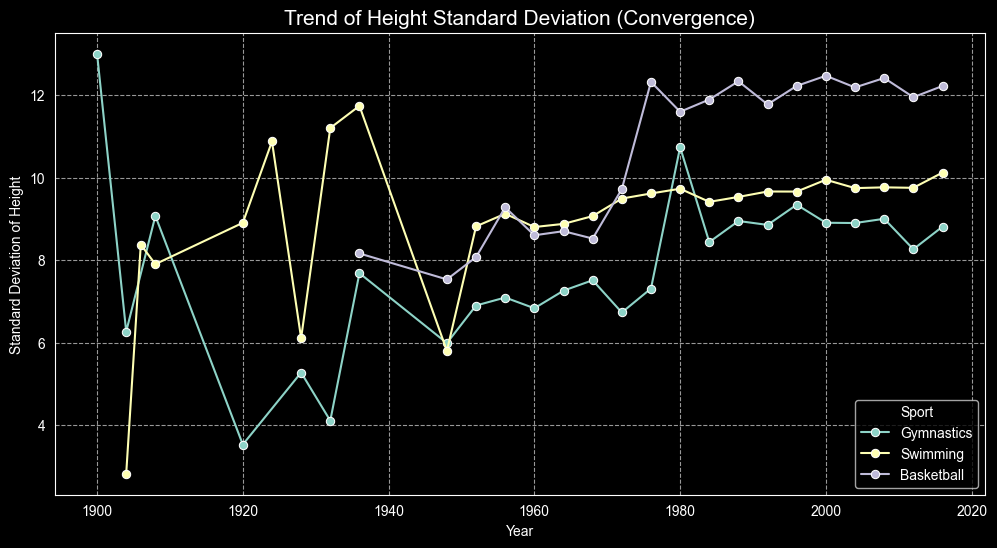

In [65]:
# 연도별, 종목별 키의 표준편차 계산
std_trend = df_target.groupby(['Year', 'Sport'])['Height'].std().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=std_trend, x='Year', y='Height', hue='Sport', marker='o')

plt.title('Trend of Height Standard Deviation (Convergence)', fontsize=
15)
plt.ylabel('Standard Deviation of Height')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

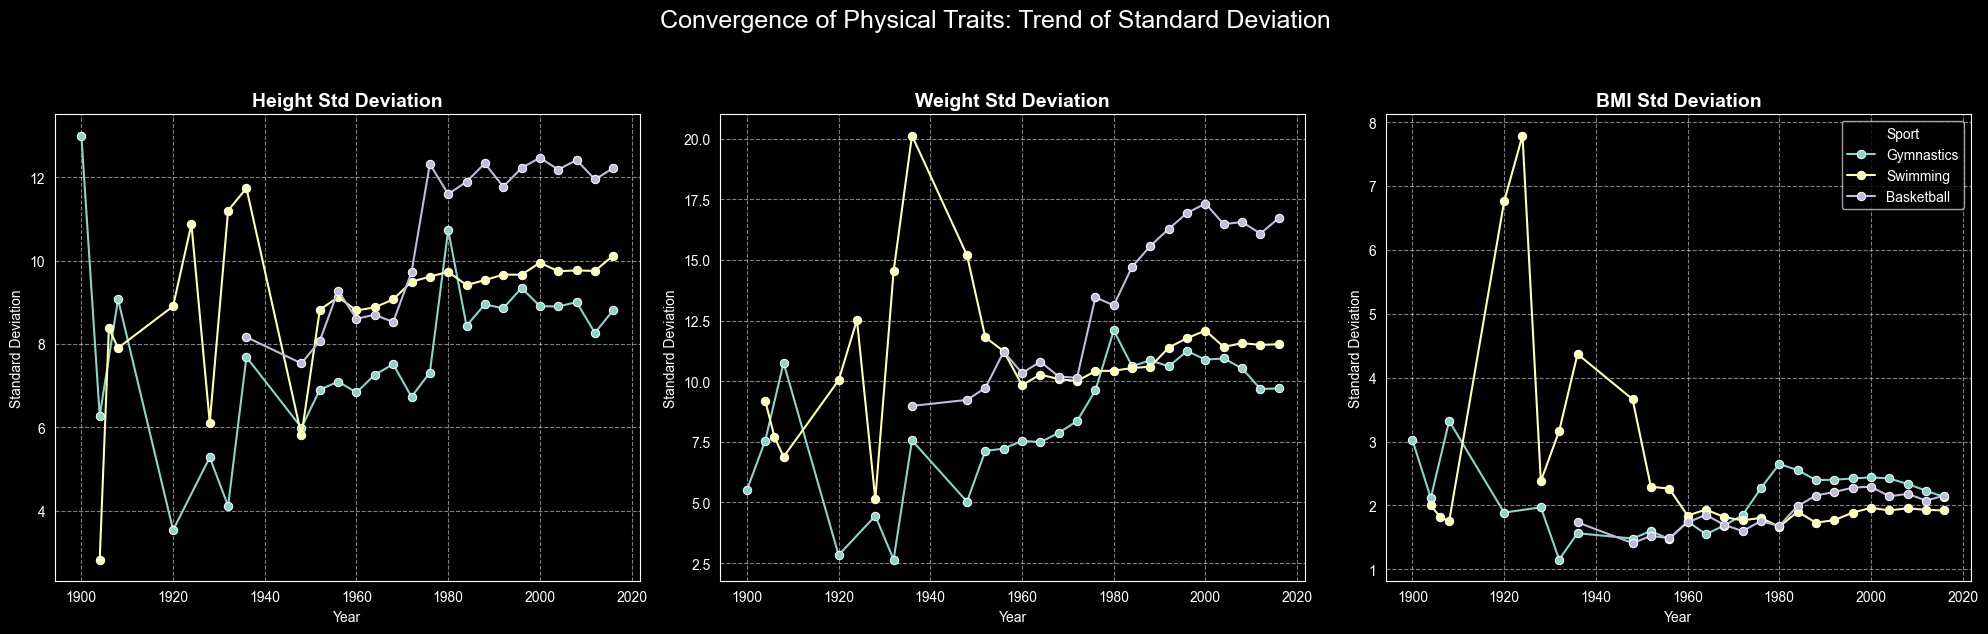

In [66]:
# 1. 지표 리스트 정의
metrics = ['Height', 'Weight', 'BMI']
titles = ['Height Std Deviation', 'Weight Std Deviation', 'BMI Std Deviation']
colors = ['#1f77b4', '#ff7f0e', '#2ca02c'] # 시각적 구분을 위한 기본 색상

# 2. Subplots 설정 (1행 3열)
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

for i, metric in enumerate(metrics):
    # 연도별, 종목별 해당 지표의 표준편차 계산
    std_data = df_target.groupby(['Year', 'Sport'])[metric].std().reset_index()

    # 선 그래프 그리기
    sns.lineplot(data=std_data, x='Year', y=metric, hue='Sport',
                 marker='o', ax=axes[i], legend=(i == 2)) # 마지막 그래프에만 범례 표시

    # 그래프 디테일 설정
    axes[i].set_title(titles[i], fontsize=14, fontweight='bold')
    axes[i].set_ylabel('Standard Deviation')
    axes[i].set_xlabel('Year')
    axes[i].grid(True, linestyle='--', alpha=0.5)

# 전체 타이틀 및 레이아웃 조정
plt.suptitle('Convergence of Physical Traits: Trend of Standard Deviation', fontsize=18, y=1.05)
plt.tight_layout()
plt.show()

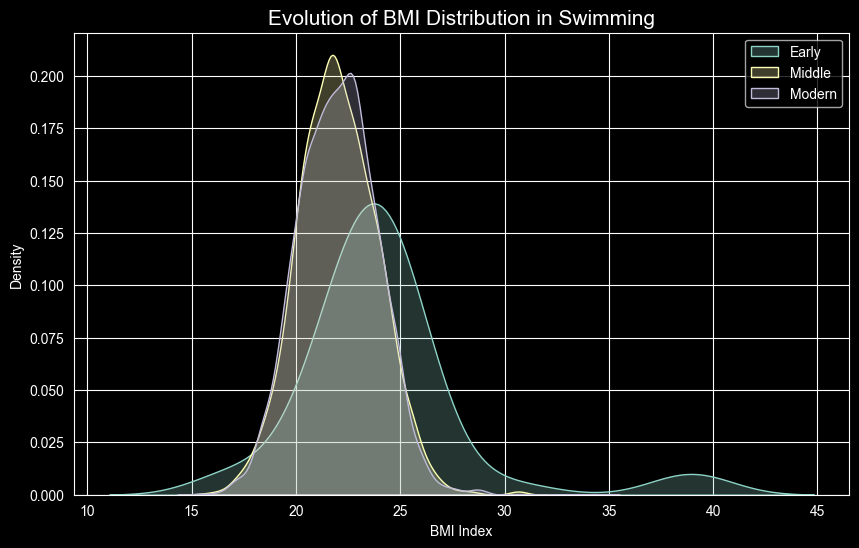

In [67]:
# 수영 종목만 선택하여 시대별 비교
swimming = df_target[df_target['Sport'] == 'Swimming'].copy()

# 시대를 40년 단위로 구분
swimming['Era'] = pd.cut(swimming['Year'], bins=[1896, 1940, 1980, 2016],
                         labels=['Early', 'Middle', 'Modern'])

plt.figure(figsize=(10, 6))
for era in ['Early', 'Middle', 'Modern']:
    sns.kdeplot(swimming[swimming['Era'] == era]['BMI'], label=era, fill=True)

plt.title('Evolution of BMI Distribution in Swimming', fontsize=15)
plt.xlabel('BMI Index')
plt.legend()
plt.show()

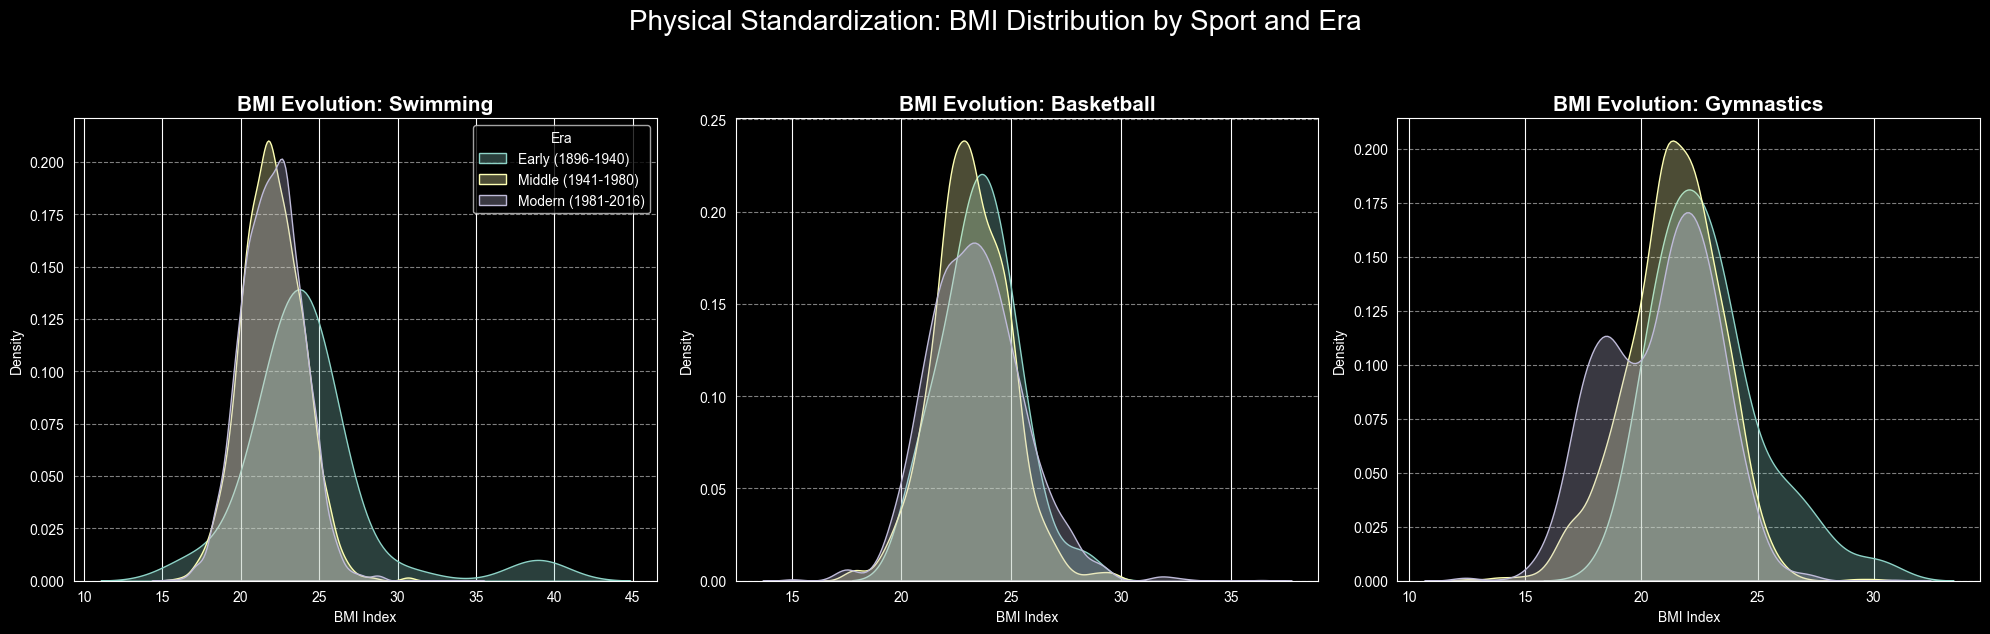

In [54]:
# 1. 시대(Era) 구분 레이블 생성
# bins 설정 시 1896년 데이터를 포함하기 위해 1895로 시작합니다.
df_target['Era'] = pd.cut(df_target['Year'], bins=[1895, 1940, 1980, 2016],
                         labels=['Early (1896-1940)', 'Middle (1941-1980)', 'Modern (1981-2016)'])

# 2. 분석 대상 종목 설정
target_sports = ['Swimming', 'Basketball', 'Gymnastics']

# 3. Subplots 설정 (1행 3열)
fig, axes = plt.subplots(1, 3, figsize=(20, 6), sharey=False)

for i, sport in enumerate(target_sports):
    sport_data = df_target[df_target['Sport'] == sport]

    # 각 시대별로 KDE Plot 그리기
    for era in df_target['Era'].cat.categories:
        era_data = sport_data[sport_data['Era'] == era]
        if not era_data.empty:
            sns.kdeplot(data=era_data, x='BMI', label=era, fill=True, ax=axes[i], alpha=0.3)

    axes[i].set_title(f'BMI Evolution: {sport}', fontsize=15, fontweight='bold')
    axes[i].set_xlabel('BMI Index')
    axes[i].set_ylabel('Density')
    axes[i].grid(axis='y', linestyle='--', alpha=0.5)

    # 첫 번째 그래프에만 범례 표시 (깔끔한 레이아웃을 위해)
    if i == 0:
        axes[i].legend(title='Era')

plt.suptitle('Physical Standardization: BMI Distribution by Sport and Era', fontsize=20, y=1.05)
plt.tight_layout()
plt.show()